### references

bishop pg 690 
bishop pg 74
prince pg 38 - ML estimation of params of categorical
prince pg 19

### Categorical Distribution

Lets consider fitting the categorical distribution, which is a discrete distribution over $K$ outcomes, which we'll number $1$ through $K$. The probability of each category is represented with parameter $\theta_{k}$. For it to be a valid probability distribution, we clearly need $\theta_{k} \ge 0$ and $\sum_{k} \theta_{k} = 1$. We'll represent each observation $\mathbf{x}$ as a 1-of-K encoding, i.e, a vector where one of the entries is 1 and the rest are 0. under this model, the probability of an observation can be written in the following form:

$$
p(\mathbf{x};\pmb{\theta}) = \prod_{k=1}^K \theta_{k}^{x_k}
$$

#### Computing the Probability of an Observation

even though this is not part of the homework, lets compute the probabilty of a single observation given some parameters. suppose we are trying to model a biased 6-sided die; the die is biased toward landing on the number 4, all other sides have equal probability. assuming this, then, a possible set of parameter values might be:

$$
\theta_1 = 0.1 \\
\theta_2 = 0.1 \\
\theta_3 = 0.1 \\
\theta_4 = 0.5 \\
\theta_5 = 0.1 \\
\theta_6 = 0.1
$$

for brevity, the six thetas are combined into a parameter vector $\pmb{\theta}$:

$$
\pmb{\theta} = \{ \theta_1, \theta_2, \theta_3, \theta_4, \theta_5, \theta_6 \}
$$

suppose we roll this die and observe the following $\mathbf{x}$:

$$
\mathbf{x} = (1,0,0,0,0,0)^{T}
$$

lets expand $p(\mathbf{x};\pmb{\theta})$ with all values substituted in:

$$
p(\mathbf{x} = (1,0,0,0,0,0)^{T}; 
\pmb{\theta} = \{ \theta_1, \theta_2, \theta_3, \theta_4, \theta_5, \theta_6 \})
$$
$$
= (\theta_{1}^{x_1})(\theta_{2}^{x_2})(\theta_{3}^{x_3})(\theta_{4}^{x_4})(\theta_{5}^{x_5})(\theta_{6}^{x_6})
$$
$$
= (0.1^1)(0.1^0)(0.1^0)(0.5^0)(0.1^0)(0.1^0)
$$
$$
= (0.1)(1)(1)(1)(1)(1)
$$
$$
= 0.1
$$

notice how the 1-of-K encoding affects the fully expanded PMF; when the kth component of the observation vector is zero, the kth factor of the PMF is 1. when the kth component of the observation vector is one, the kth factor of the PMF is $\theta_k$. Here is the same computation for a different observation:

$$
p(\mathbf{x} = (0,0,0,1,0,0)^{T}; 
\pmb{\theta} = \{ \theta_1, \theta_2, \theta_3, \theta_4, \theta_5, \theta_6 \})
$$
$$
= (\theta_{1}^{x_1})(\theta_{2}^{x_2})(\theta_{3}^{x_3})(\theta_{4}^{x_4})(\theta_{5}^{x_5})(\theta_{6}^{x_6})
$$
$$
= (0.1^0)(0.1^0)(0.1^0)(0.5^1)(0.1^0)(0.1^0)
$$
$$
= (1)(1)(1)(0.5)(1)(1)
$$
$$
= 0.5
$$

#### HW part a1

Determine the formula for the maximum likelihood estimate of the parameters in terms of the counts 
$N_k = \sum_{i} x_k^{(i)}$ of all the outcomes. You may assume all of the counts are nonzero. Note that your solution needs to obey the constrains $\theta_k \ge 0$ and $\sum_{k} \theta_{k} = 1$. see kahn academy lecture [here](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/lagrange-multipliers-and-constrained-optimization/v/constrained-optimization-introduction).

given $I$ independent categoricaly distributed observations, the likelihood function is defined as the product of the PMF evaluated at each observation:

$$
l(\mathbf{x}_1,\mathbf{x}_2,...,\mathbf{x}_N;\pmb{\theta}) = 
p(\mathbf{x}_1;\pmb{\theta})p(\mathbf{x}_2;\pmb{\theta})...p(\mathbf{x}_I;\pmb{\theta}) \\
$$
$$ 
= \prod_{i=1}^{I} p(\mathbf{x}_i;\pmb{\theta})
$$
$$ 
= \prod_{i=1}^{I} \prod_{k=1}^K \theta_{k}^{x_{k}^{(i)}}
$$

commutativity gives us

$$
= \prod_{k=1}^K \prod_{i=1}^{I} \theta_{k}^{x_{k}^{(i)}}
$$

expand this a bit

$$
= \prod_{k=1}^K \theta_{k}^{x_{k}^{(1)}}\theta_{k}^{x_{k}^{(2)}}...\theta_{k}^{x_{k}^{(I)}}
$$

using properties of exponents

$$
= \prod_{k=1}^K \theta_{k}^{( x_{k}^{(1)} + x_{k}^{(2)} + ... + x_{k}^{(I)} )}
$$

using more formal notation

$$
= \prod_{k=1}^K \theta_{k}^{(\sum_{i}^I x_k^{(i)})}
$$

we let $N_k = \sum_{i} x_k^{(i)}$ as prescribed above

$$
= \prod_{k=1}^K \theta_{k}^{N_k}
$$

we must find the $\theta_k$s that maximize this expression. in typical fashion, we maximize the log of this expression:

$$
ln \prod_{k=1}^K \theta_{k}^{N_k}
$$

log of a product of terms is the sum of the log of the terms

$$
= \sum_{k=1}^K ln(\theta_{k}^{N_k})
$$

using property $ln(x^n) = n\ ln (x)$ 

$$
= \sum_{k=1}^K N_k\ ln(\theta_{k})
$$

TODO: still need to show that the ML estimate obeys constrains of categorical distribution

#### HW part 1b

Now consider Bayesian parameter estimation. For the prior, we'll use the Dirichlet distribution, which is defined over the set of probability vectors (i.e. vectors that are non negative and whose entries sum to 1). Its PDF is as follows:

$$
p(\pmb{\theta}) \propto \theta_{1}^{a_1-1} ... \theta_{K}^{a_k-1}
$$

A useful fact is that if $\pmb{\theta} \sim Dirichlet(a_1,...,a_k)$, then

$$
\mathbb{E}[\theta_k] = \frac{a_k}{\sum_{k'} a_{k'}}
$$

Determine the posterior distribution $p(\pmb{\theta}|\mathcal{D})$, where $\mathcal{D}$ is the set of observations. From that, determine the posterior predictive probability that the next outcome will be $k$.

##### Showing that the Dirichlet is Conjugate to the Categorical

the full form of the dirichlet distribution (adapted from prince, bishop) is as follows:

$$
p(\pmb{\theta};\mathbf{a}) =
\mathcal{c}(\mathbf{a}) \prod_{k=1}^{K} \theta_{k}^{a_k - 1} =
Dir_{\pmb{\theta}}[\mathbf{a}]
$$

where

$$
\mathcal{c}(\mathbf{a}) = 
\frac
{
\Gamma(\sum_{k=1}^K a_k)
}
{
\prod_{k=1}^K \Gamma(a_k)
}
$$

##### aside

in all subsequent steps, we expand all the definitions in the numerator and denominator. it should be clear that the expressions in the numerator and denominator *do not change* and are only manipulated algebraically. the entire expression represents a particular instantiation of bayes rule:

$$
p(\pmb{\theta}|\mathcal{D}) =
\frac
{
p(\mathcal{D},\pmb{\theta})
}
{
\int_{\pmb{\theta}} p(\mathcal{D},\pmb{\theta})
}
$$

##### showing conjugacy

our goal is too determine the posterior distribution over $K$ parameters given $I$ data (where each datum is one-hot encoding of class $k$):

$$
p(\theta_1...\theta_K|\mathbf{x}_1...\mathbf{x}_I)
$$

we expand this expression using bayes rule. the likelihood term for the data given the parameters is the same as defined in part 1a. the prior is a dirichlet distribution over $\pmb{\theta}$ which is parameterized by a vector $\mathbf{a}$ whose components can take on arbitrary positive values.

$$
= \frac
{
(\prod_{i=1}^{I} Cat_{\mathbf{x}^{(i)}} [\pmb{\theta}])
(Dir_{\pmb{\theta}}[\mathbf{a}])
}
{
\int_{\theta}(
(\prod_{i=1}^{I} Cat_{\mathbf{x}^{(i)}} [\pmb{\theta}])
(Dir_{\pmb{\theta}}[\mathbf{a}]))
}
$$

we then expand the definitions further:

$$
= \frac
{
(\prod_{i=1}^{I} \prod_{k=1}^K \theta_{k}^{x_{k}^{(i)}})
(\mathcal{c}(\mathbf{a}) \prod_{k=1}^{K} \theta_{k}^{a_k - 1})
}
{
\int_{\theta}(
(\prod_{i=1}^{I} \prod_{k=1}^K \theta_{k}^{x_{k}^{(i)}})
(\mathcal{c}(\mathbf{a}) \prod_{k=1}^{K} \theta_{k}^{a_k - 1}))
}
$$

we know from part 1a of this homework that the likelihood term reduces to

$$
= \frac
{
(\prod_{k=1}^K \theta_{k}^{N_k})
(\mathcal{c}(\mathbf{a}) \prod_{k=1}^{K} \theta_{k}^{a_k - 1})
}
{
\int_{\theta}(
(\prod_{k=1}^K \theta_{k}^{N_k})
(\mathcal{c}(\mathbf{a}) \prod_{k=1}^{K} \theta_{k}^{a_k - 1}))
}
$$

where $N_k = \sum_{i} x_k^{(i)}$. Next we use simple algebra to add exponents

$$
= \frac
{
\mathcal{c}(\mathbf{a}) \prod_{k=1}^{K} \theta_{k}^{a_k - 1 + N_k}
}
{
\int_{\theta}(
\mathcal{c}(\mathbf{a}) \prod_{k=1}^{K} \theta_{k}^{a_k - 1 + N_k})
}
$$

if we rearrage the terms in the exponent, we start to get a clearer picture of what is going on

$$
= \frac
{
\mathcal{c}(\mathbf{a}) \prod_{k=1}^{K} \theta_{k}^{(a_k + N_k) - 1}
}
{
\int_{\theta}(
\mathcal{c}(\mathbf{a}) \prod_{k=1}^{K} \theta_{k}^{(a_k + N_k) - 1}
)
}
$$

lets define a new vector $\widetilde{\mathbf{a}}$ where 
$\widetilde{a_k} = a_k + N_k$. now we introduce the following quantities into the expression of the posterior:

$$
= 
\frac
{
c(\mathbf{a}) 
\frac{c(\widetilde{\mathbf{a}})}{c(\widetilde{\mathbf{a}})}
\prod_{k=1}^{K} \theta_{k}^{\widetilde{a_k} - 1}
}
{
\int_{\theta}(
c(\mathbf{a}) 
\frac{c(\widetilde{\mathbf{a}})}{c(\widetilde{\mathbf{a}})}
\prod_{k=1}^{K} \theta_{k}^{\widetilde{a_k} - 1}
)
}
$$

we reassociate terms to yield:

$$
= 
\frac
{
\frac {c(\mathbf{a})} {c(\widetilde{\mathbf{a}})}
c(\widetilde{\mathbf{a}})
\prod_{k=1}^{K} \theta_{k}^{\widetilde{a_k} - 1}
}
{
\int_{\theta}(
\frac {c(\mathbf{a})} {c(\widetilde{\mathbf{a}})}
c(\widetilde{\mathbf{a}})
\prod_{k=1}^{K} \theta_{k}^{\widetilde{a_k} - 1}
)
}
$$

simplify notation

$$
= 
\frac
{
\frac {c(\mathbf{a})} {c(\widetilde{\mathbf{a}})}
Dir_{\pmb{\theta}}[\widetilde{\mathbf{a}}]
}
{
\int_{\theta}(
\frac {c(\mathbf{a})} {c(\widetilde{\mathbf{a}})}
Dir_{\pmb{\theta}}[\widetilde{\mathbf{a}}]
)
}
$$

notice that the term $\frac {c(\mathbf{a})} {c(\widetilde{\mathbf{a}})}$ factors out of the integral and cancels with the term in the numerator

$$
= 
\frac
{
Dir_{\pmb{\theta}}[\widetilde{\mathbf{a}}]
}
{
\int_{\theta}(
Dir_{\pmb{\theta}}[\widetilde{\mathbf{a}}]
)
}
$$

notice how the denomenator is an integral wrt to $\pmb{\theta}$ and the integrand is a distribution over $\pmb{\theta}$, so by the rules of probability, it must integrate to 1.

$$
= 
\frac
{
Dir_{\pmb{\theta}}[\widetilde{\mathbf{a}}]
}
{
1
}
$$


$$
= Dir_{\pmb{\theta}}[\widetilde{\mathbf{a}}]
$$



In [39]:
# http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import scipy.stats as stats

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)


# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])

def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

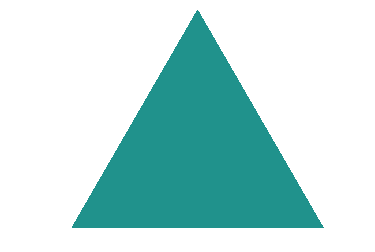

In [41]:
draw_pdf_contours2([1.,1.,1.])

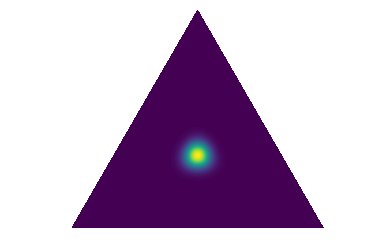

In [47]:
draw_pdf_contours2([50,50,50])

### scratch

$$
\mathbf{x}_1 = (1,0,0) \\
\mathbf{x}_2 = (0,1,0) \\
\mathbf{x}_3 = (0,0,1) \\
\mathbf{x}_4 = (0,0,1)
$$

$$ 
\prod_{n=1}^{4} \prod_{k=1}^3 \theta_{k}^{x_{nk}}
$$

$$
\prod_{n=1}^{4} ( (\theta_{1}^{x_{n1}})(\theta_{2}^{x_{n2}})(\theta_{3}^{x_{n3}}) )
$$

$$
(\theta_{1}^{x_{11}})(\theta_{2}^{x_{12}})(\theta_{3}^{x_{13}})
(\theta_{1}^{x_{21}})(\theta_{2}^{x_{22}})(\theta_{3}^{x_{23}})
(\theta_{1}^{x_{31}})(\theta_{2}^{x_{32}})(\theta_{3}^{x_{33}})
(\theta_{1}^{x_{41}})(\theta_{2}^{x_{42}})(\theta_{3}^{x_{43}})
$$

$$
(\theta_{1}^1)(\theta_{2}^0)(\theta_{3}^0)
(\theta_{1}^0)(\theta_{2}^1)(\theta_{3}^0)
(\theta_{1}^0)(\theta_{2}^0)(\theta_{3}^1)
(\theta_{1}^0)(\theta_{2}^0)(\theta_{3}^1)
$$